# Homemade K-Means Clustering Algorithm in Python

In [20]:
import sys
import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats.mstats import gmean
from KMeans import KMeans
import sklearn
from sklearn.cluster import KMeans as SKKMeans
import seaborn as sns

## Versions

In [112]:
print(f"Python version\n{sys.version}\n")
print("Pandas version:       ", pd.__version__)
print("NumPy version:        ", np.__version__)
print("Matplotlib version:   ", matplotlib.__version__)
print("SciPy version:        ", scipy.__version__)
print("scikit-learn version:", sklearn.__version__)

Python version
3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]

Pandas version:        0.25.1
NumPy version:         1.17.2
Matplotlib version:    3.1.1
SciPy version:         1.3.1
scikit-learn version: 0.22.2.post1


## Demonstration

### Randomizing Data

In [3]:
random.seed(84)
data = np.array([
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
])

data

array([[ 4,  0],
       [ 7,  0],
       [ 8, 10],
       [ 5,  3],
       [ 7,  7],
       [ 8,  5],
       [ 9,  2],
       [ 8,  4],
       [ 8,  7],
       [ 6,  5],
       [ 9,  3],
       [ 2, 10],
       [ 7,  0],
       [ 8,  0],
       [ 2,  0],
       [ 7,  8],
       [10,  4],
       [ 8,  1],
       [ 0,  3],
       [ 3,  6],
       [ 2,  4],
       [ 1,  4],
       [ 1,  1],
       [ 8,  1],
       [ 7,  8]])

In [4]:
x = []
y = []
for i, j in data:
    x.append(i)
    y.append(j)
    
x

[4, 7, 8, 5, 7, 8, 9, 8, 8, 6, 9, 2, 7, 8, 2, 7, 10, 8, 0, 3, 2, 1, 1, 8, 7]

In [5]:
y

[0, 0, 10, 3, 7, 5, 2, 4, 7, 5, 3, 10, 0, 0, 0, 8, 4, 1, 3, 6, 4, 4, 1, 1, 8]

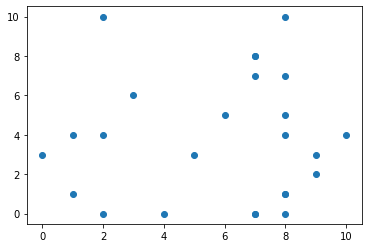

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:
df = pd.DataFrame({"x" : x, "y" : y})

print(df.shape)
df

(25, 2)


x   y
0    4   0
1    7   0
2    8  10
3    5   3
4    7   7
5    8   5
6    9   2
7    8   4
8    8   7
9    6   5
10   9   3
11   2  10
12   7   0
13   8   0
14   2   0
15   7   8
16  10   4
17   8   1
18   0   3
19   3   6
20   2   4
21   1   4
22   1   1
23   8   1
24   7   8

### Trying Homemade K-Means Clustering Algorithm on Data

In [8]:
# Note here that n_iter=10 is the default
# but has been expressly stated here for the reader's benefit.

kmeans = KMeans(n_clusters=3, random_state=84)
kmeans_fit = kmeans.fit(data)

print(kmeans.clusters)

[0 0 2 0 2 2 0 2 2 2 0 2 0 0 1 2 0 0 1 2 1 1 1 0 2]


/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:332: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


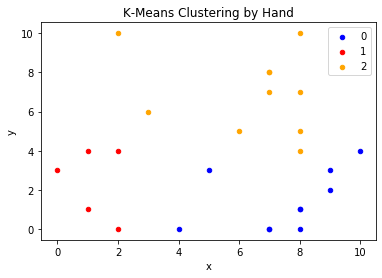

In [9]:
colors = {1 : 'red', 0 : 'blue', 2 : "orange"}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering by Hand')

grouped = df.groupby(kmeans.clusters)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

### Comparison with Scikit-learn K-Means Function

In [10]:
skkmeans = SKKMeans(n_clusters=3, random_state=84)
skkmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=84, tol=0.0001, verbose=0)

So far the results are *fairly similar*, but clearly, the scikit-learn implementaion is better at identifying appropriate clusters, at least in this example. 

In [11]:
skkmeans = skkmeans.fit(data)
print(skkmeans.labels_)

[0 1 2 0 2 2 1 1 2 2 1 2 1 1 0 2 1 1 0 0 0 0 0 1 2]


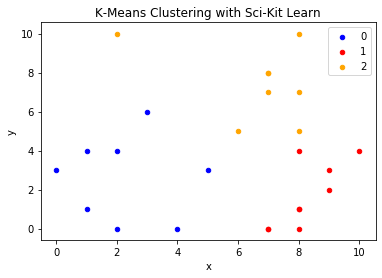

In [12]:
colors = {0 : 'blue', 1 : 'red', 2 : "orange"}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering with Sci-Kit Learn')

grouped = df.groupby(skkmeans.labels_)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

#### Key Differences:

##### n_iter used instead of max_iter
__Note above__ in that the Sci-Kit Learn implementation of the algorithm that there is a *max_iter* and *tol* hyper-parameter. In a truly dynamic implementation of K-Means Clustering, these two work together to let the program know when to stop optimizing in its search for the center of each cluster. In this case, however, the homemade implementation is less dynamic, with an *n_iter* hyper-parameter taking the place of *max_iter* and *tol* not being used entirely. The effect of this is that, by tuning, *n_iter* the programmer can see each stage of the optimization process as demonstrated below.

In [13]:
algs = []
for i in range(4):
    alg = KMeans(n_clusters=3, n_iter=i, random_state=84)
    algs.append(alg)
    alg.fit(data)
    print(alg.clusters)

[0 0 2 1 2 1 0 1 2 1 0 2 0 0 0 2 0 0 1 1 1 1 1 0 2]
[0 0 2 0 2 2 0 0 2 2 0 2 0 0 1 2 0 0 1 2 1 1 1 0 2]
[0 0 2 0 2 2 0 2 2 2 0 2 0 0 1 2 0 0 1 2 1 1 1 0 2]
[0 0 2 0 2 2 0 2 2 2 0 2 0 0 1 2 0 0 1 2 1 1 1 0 2]


/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:332: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Note that the first three NumPy arrays containing the clusters change with each successive itteration; whereas, the fourth is identical to the third. Given that all successive itterations --including those beyond four--- would be equal to the third, this indicates that the algorith has converged.

Let's visualize this below.

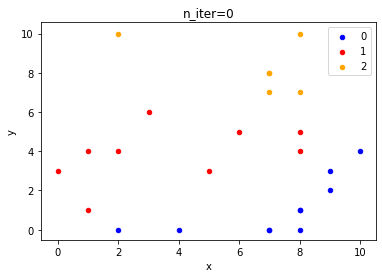

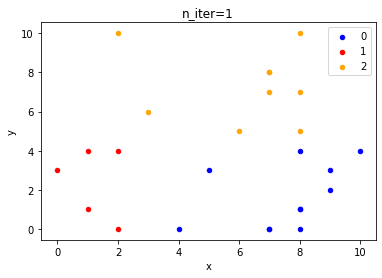

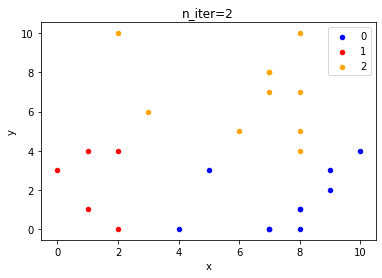

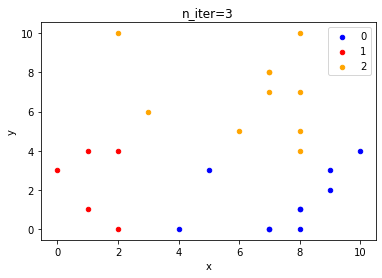

In [14]:
colors = {0 : 'blue', 1 : 'red', 2 : "orange"}

for alg in algs:
    fig, ax = plt.subplots()
    ax.set_title(f'n_iter={algs.index(alg)}')
    
    grouped = df.groupby(alg.clusters)
    for key, group in grouped:
        group.plot(ax = ax, kind = 'scatter', x = 'x',
                   y = 'y', label = key, color = colors[key])
        
    plt.show()

##### Homemade Algorithm doesn't always deliver number of clusters desired.

Examining the number of cluster IDs which actually appear in the algorithm.
cluster attribute below as n_clusters raises, one finds that Homemade Algorithm sometimes fails to produce a matching number of clusters. This is especially true for smaller datasets with higher *n_cluster* values. In fact, in the case of this data set, setting *n_iter* higher than 6, results in an error message 

In [15]:
algorithms = []
for i in range(3, 6):
    alg = KMeans(n_clusters=i, n_iter=10, random_state=84)
    algorithms.append(alg)
    alg.fit(data)
    print(alg.clusters)

[0 0 2 0 2 2 0 2 2 2 0 2 0 0 1 2 0 0 1 2 1 1 1 0 2]
[3 0 2 2 2 2 0 2 2 2 0 2 0 0 3 2 0 0 1 2 1 1 3 0 2]
[3 0 2 2 2 2 0 2 2 2 0 2 0 0 3 2 0 0 1 2 1 1 3 0 2]


In [16]:
for algorithm in algorithms:
    print(f"n_clusters={algorithms.index(algorithm) + 3}, {len(list(set(algorithm.clusters)))}")

n_clusters=3, 3
n_clusters=4, 4
n_clusters=5, 4


### Comparison with Real Data

With this in mind, to properly test they by-hand algorithm against its scikit-learn implementation one ought to use some real-world data. For this purpose, we will use a dataset with tumor measurements from mammograms.

In [17]:
breast_cancer = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")

print(breast_cancer.shape)
breast_cancer.head()

(569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [18]:
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [19]:
breast_cancer = breast_cancer.drop(columns=["id", "diagnosis", "Unnamed: 32"])

print(breast_cancer.shape)
breast_cancer.head()

(569, 30)


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

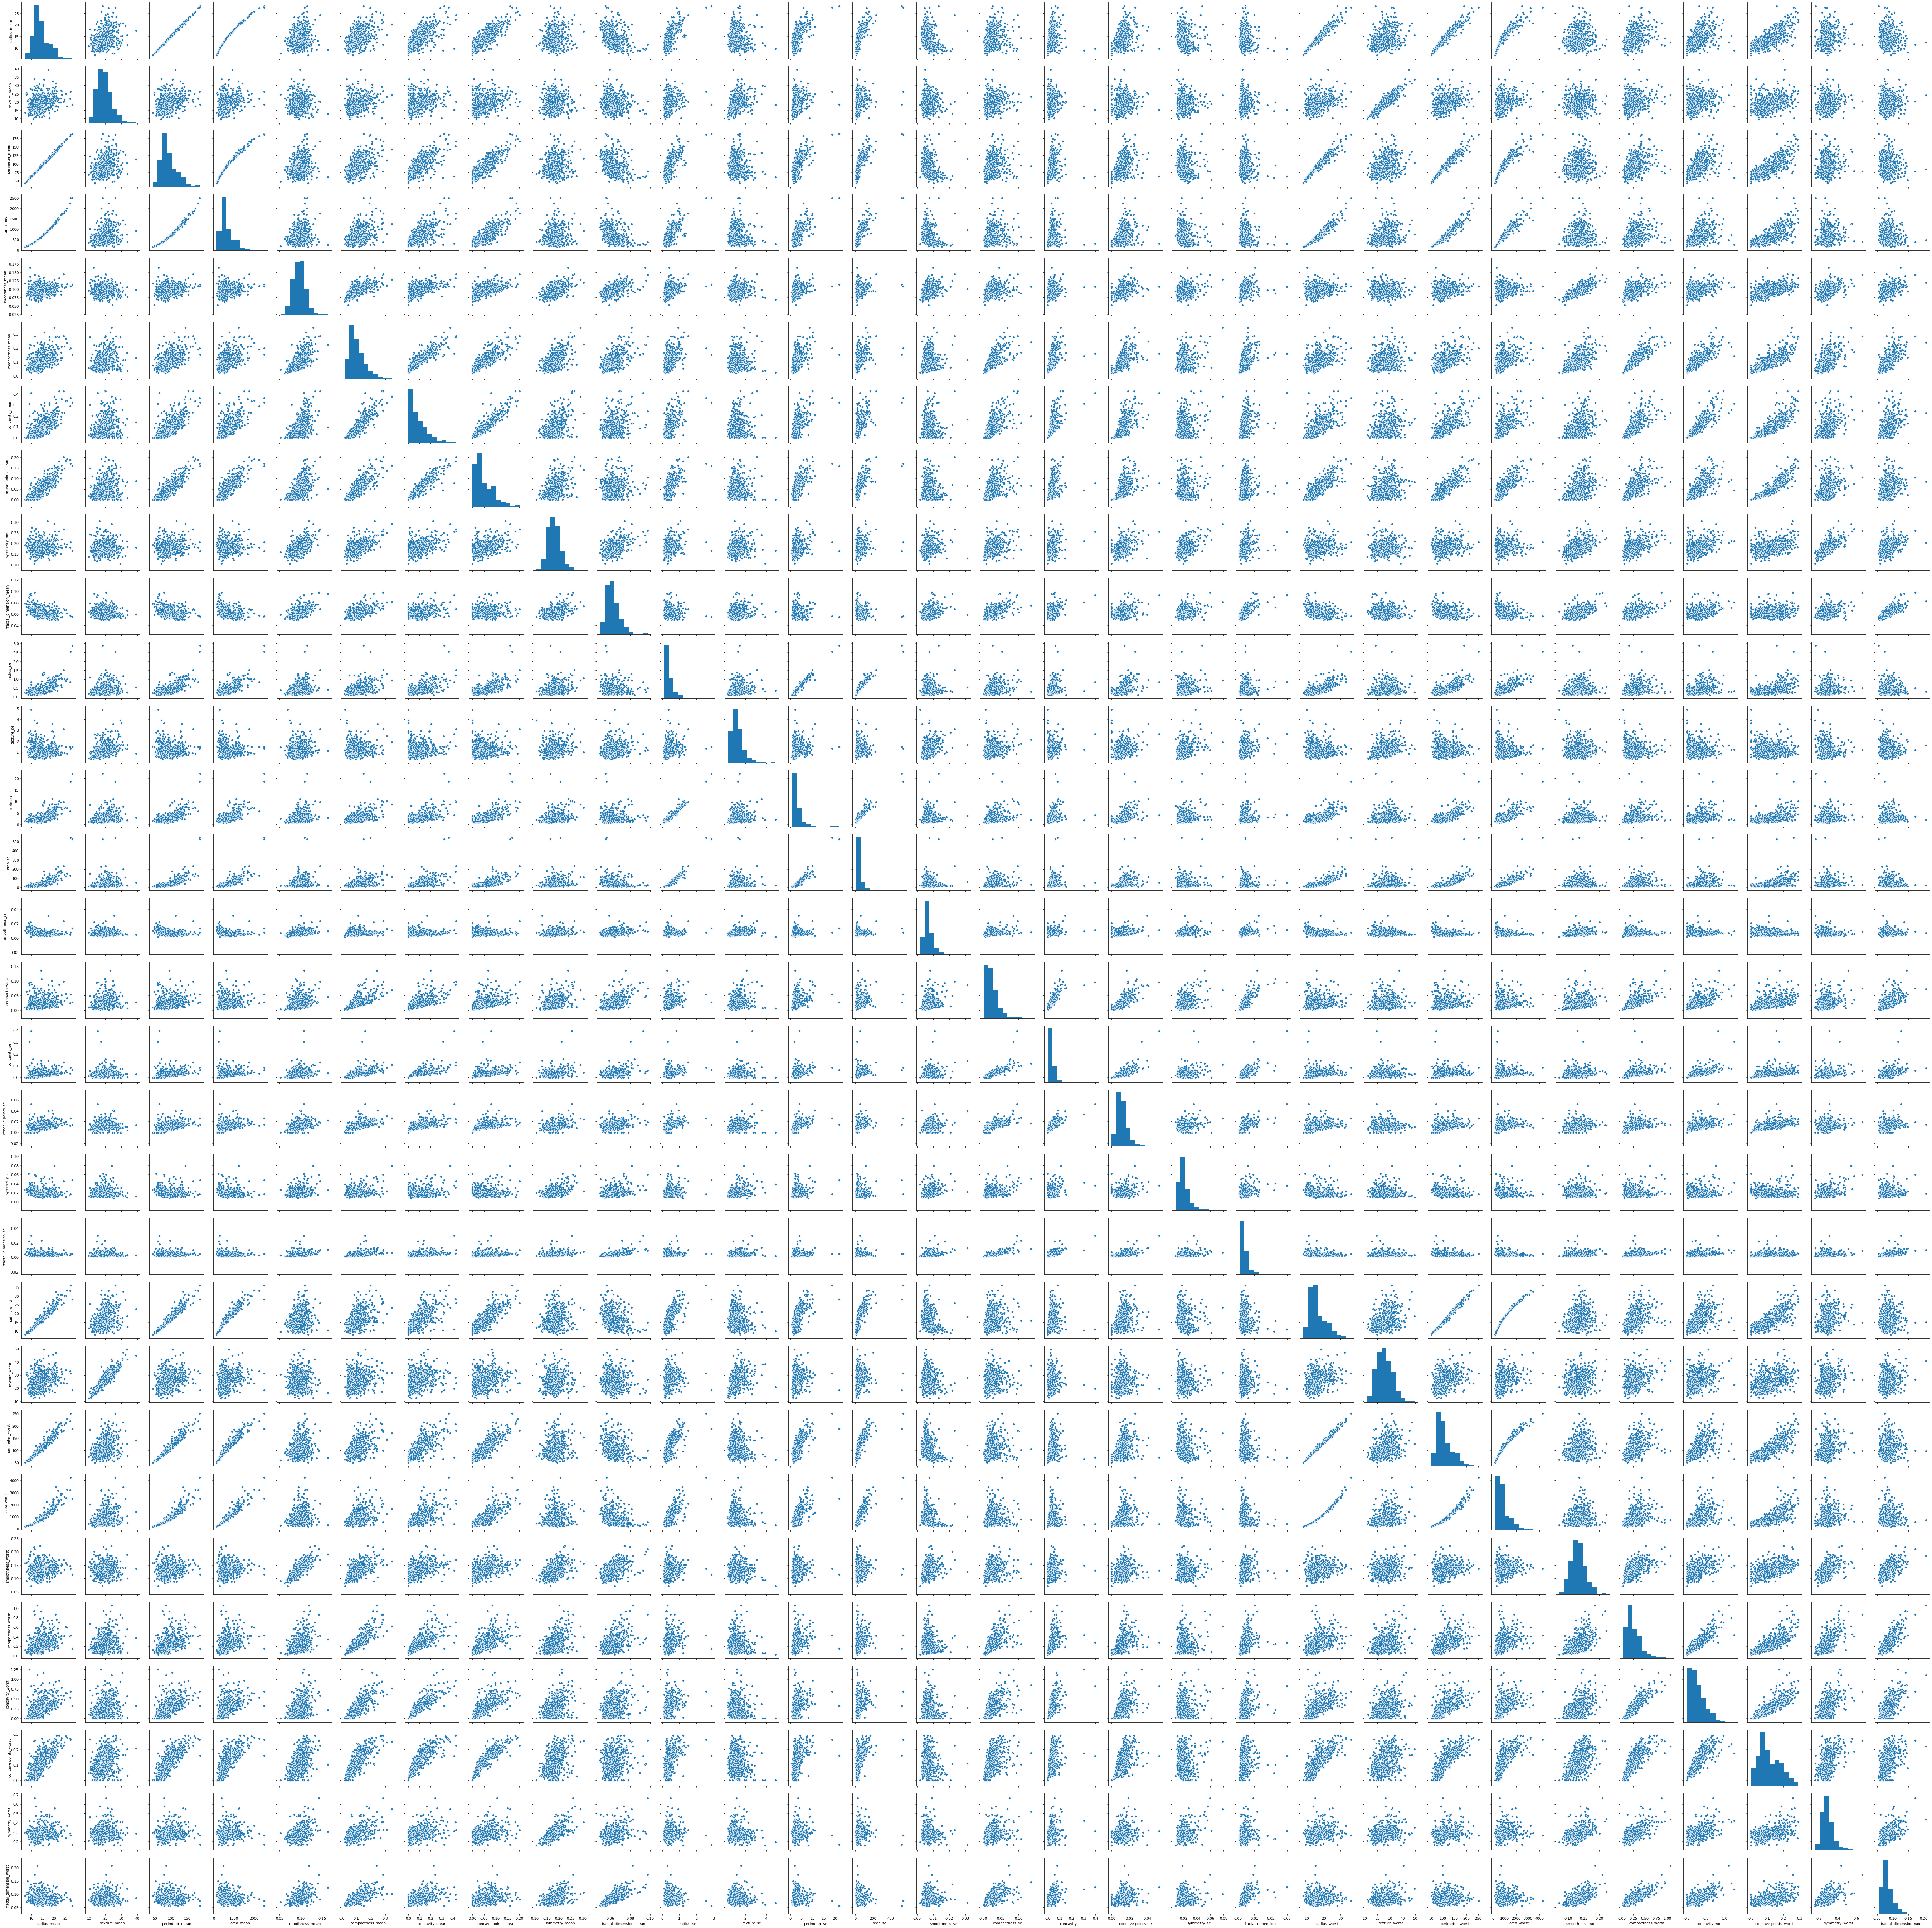

In [21]:
sns.pairplot(breast_cancer)

In [97]:
subset = breast_cancer[["texture_mean", "smoothness_worst"]]

print(subset.shape)
subset.head()

(569, 2)


texture_mean  smoothness_worst
0         10.38            0.1622
1         17.77            0.1238
2         21.25            0.1444
3         20.38            0.2098
4         14.34            0.1374

In [98]:
subset_arr = subset[["texture_mean", "smoothness_worst"]].to_numpy()
subset_arr

array([[10.38   ,  0.1622 ],
       [17.77   ,  0.1238 ],
       [21.25   ,  0.1444 ],
       ...,
       [28.08   ,  0.1139 ],
       [29.33   ,  0.165  ],
       [24.54   ,  0.08996]])

In [99]:
bckmeans = KMeans(n_clusters=10)
bckmeans.fit(subset_arr)
bckmeans.clusters

array([3, 4, 1, 7, 2, 2, 7, 7, 1, 0, 0, 4, 9, 0, 1, 5, 7, 7, 1, 2, 2, 3,
       2, 0, 1, 4, 1, 7, 9, 2, 9, 6, 0, 9, 4, 1, 1, 6, 9, 7, 1, 1, 9, 7,
       1, 4, 4, 6, 2, 1, 1, 2, 6, 6, 1, 6, 6, 1, 6, 3, 2, 7, 1, 3, 0, 0,
       7, 6, 4, 4, 1, 2, 9, 2, 4, 7, 3, 2, 0, 4, 7, 2, 9, 9, 2, 6, 1, 9,
       1, 2, 0, 0, 2, 6, 7, 0, 4, 7, 3, 7, 9, 3, 7, 6, 6, 2, 6, 6, 7, 1,
       4, 7, 7, 7, 2, 1, 2, 4, 0, 7, 3, 4, 7, 3, 4, 4, 9, 6, 4, 9, 3, 6,
       1, 3, 1, 1, 4, 2, 4, 3, 3, 4, 4, 2, 2, 2, 4, 6, 2, 4, 7, 7, 2, 3,
       2, 4, 7, 6, 3, 3, 7, 2, 6, 1, 1, 7, 3, 6, 9, 4, 3, 6, 3, 2, 2, 2,
       4, 7, 1, 3, 1, 5, 7, 2, 1, 2, 6, 4, 4, 2, 0, 1, 6, 5, 0, 2, 1, 1,
       1, 7, 6, 6, 5, 0, 6, 4, 4, 7, 1, 3, 1, 6, 6, 9, 0, 4, 6, 4, 1, 8,
       3, 3, 4, 7, 4, 3, 2, 2, 0, 1, 6, 5, 8, 5, 2, 1, 5, 1, 5, 8, 2, 2,
       6, 0, 0, 7, 4, 3, 9, 2, 0, 6, 7, 4, 6, 4, 5, 4, 0, 8, 5, 0, 1, 6,
       1, 8, 6, 1, 2, 7, 4, 3, 7, 2, 9, 4, 2, 7, 4, 2, 5, 3, 6, 6, 2, 6,
       7, 3, 7, 6, 7, 6, 2, 4, 3, 3, 3, 6, 6, 0, 6,

In [100]:
clusters = pd.Series(bcskkmeans.labels_)
subset['clusters_by_hand'] = clusters.values

subset.head()

/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


texture_mean  smoothness_worst  clusters_by_hand
0         10.38            0.1622                 2
1         17.77            0.1238                 0
2         21.25            0.1444                 3
3         20.38            0.2098                 6
4         14.34            0.1374                 5

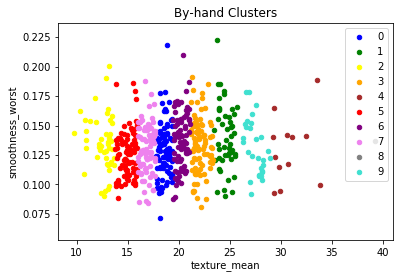

In [113]:
colors = {0 : 'blue', 1 : 'green', 2 : 'yellow', 3 : 'orange', 4 : 'brown',
          5 : 'red', 6 : 'purple', 7 : 'violet', 8 : 'grey', 9 : 'turquoise'}

fig, ax = plt.subplots()
plt.title("By-hand Clusters")
grouped = subset.groupby('clusters_by_hand')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'texture_mean',
               y = 'smoothness_worst', label = key, color = colors[key])
plt.show()

In [101]:
bcskkmeans = SKKMeans(n_clusters=10)
bcskkmeans.fit(subset)
bcskkmeans.labels_

array([6, 3, 0, 5, 1, 1, 5, 5, 0, 4, 0, 3, 4, 4, 0, 2, 5, 5, 0, 1, 1, 6,
       1, 0, 0, 7, 0, 5, 4, 1, 4, 3, 4, 2, 3, 0, 0, 3, 4, 5, 0, 0, 4, 5,
       0, 7, 7, 3, 1, 0, 0, 7, 3, 3, 0, 3, 3, 0, 3, 6, 1, 5, 0, 1, 4, 4,
       5, 3, 7, 7, 0, 1, 4, 1, 7, 5, 6, 7, 4, 3, 5, 1, 4, 2, 1, 3, 0, 4,
       0, 1, 4, 0, 1, 3, 5, 0, 3, 5, 6, 5, 4, 6, 5, 3, 3, 1, 3, 3, 5, 0,
       7, 5, 5, 5, 1, 0, 1, 7, 0, 5, 6, 7, 5, 6, 7, 7, 4, 3, 7, 4, 6, 5,
       0, 1, 0, 0, 7, 1, 7, 6, 6, 3, 7, 1, 1, 1, 7, 3, 1, 3, 5, 5, 1, 6,
       1, 3, 5, 5, 6, 6, 5, 1, 3, 0, 0, 5, 6, 3, 4, 7, 6, 5, 6, 1, 1, 1,
       3, 5, 0, 6, 0, 2, 5, 1, 0, 1, 3, 7, 7, 1, 0, 0, 3, 2, 0, 7, 0, 0,
       0, 5, 5, 3, 2, 4, 3, 7, 7, 5, 0, 6, 0, 3, 3, 4, 4, 7, 3, 7, 0, 8,
       6, 1, 7, 5, 7, 6, 1, 1, 4, 0, 3, 2, 8, 2, 1, 0, 2, 0, 2, 9, 1, 1,
       3, 4, 4, 5, 7, 1, 4, 1, 4, 3, 5, 7, 3, 7, 2, 7, 0, 8, 2, 0, 0, 3,
       0, 8, 3, 0, 7, 5, 7, 6, 5, 1, 4, 7, 1, 5, 3, 1, 2, 1, 3, 3, 1, 3,
       5, 6, 5, 3, 5, 3, 7, 7, 1, 6, 6, 3, 3, 0, 3,

In [102]:
clusters = pd.Series(bcskkmeans.labels_)
subset['clusters_sklearn'] = clusters.values

subset.head()

/Users/samuel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


texture_mean  smoothness_worst  clusters_by_hand  clusters_sklearn
0         10.38            0.1622                 2                 6
1         17.77            0.1238                 0                 3
2         21.25            0.1444                 3                 0
3         20.38            0.2098                 6                 5
4         14.34            0.1374                 5                 1

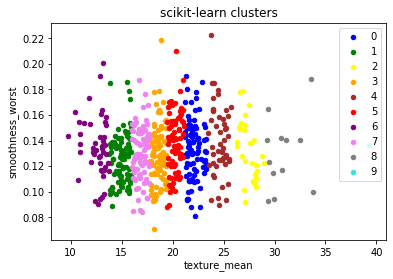

In [114]:
colors = {0 : 'blue', 1 : 'green', 2 : 'yellow', 3 : 'orange', 4 : 'brown',
          5 : 'red', 6 : 'purple', 7 : 'violet', 8 : 'grey', 9 : 'turquoise'}

fig, ax = plt.subplots()
grouped = subset.groupby('clusters_sklearn')
plt.title("scikit-learn clusters")
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'texture_mean',
               y = 'smoothness_worst', label = key, color = colors[key])
plt.show()

Considering that numbers assigned by the algorithm and, by extension, the colors in the visualization are both arbitrary, for all practical purposes, these two graphs are __*identical*__.